In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

,Extent,Date
0,1107873.946,1979-01-01
1,1211101.473,1979-02-01
2,1215128.770,1979-03-01
3,1233940.811,1979-04-01
4,1193061.566,1979-05-01
...,...,...
533,124025.343,2023-06-01
534,53107.426,2023-07-01
535,11242.827,2023-08-01
536,3272.024,2023-09-01


In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 4
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Barents['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((523, 12, 1), (523,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Barents_model_LT4/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
52/53 [============================>.] - ETA: 0s - loss: 0.1900 - root_mean_squared_error: 0.4359

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 8s 101ms/step - loss: 0.1893 - root_mean_squared_error: 0.4351 - val_loss: 0.0537 - val_root_mean_squared_error: 0.2318
Epoch 2/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1237 - root_mean_squared_error: 0.3518

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.1292 - root_mean_squared_error: 0.3594 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2011
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.0963 - root_mean_squared_error: 0.3104

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0963 - root_mean_squared_error: 0.3104 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1787
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0732 - root_mean_squared_error: 0.2706

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0756 - root_mean_squared_error: 0.2750 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1675
Epoch 5/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0579 - root_mean_squared_error: 0.2406

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0602 - root_mean_squared_error: 0.2453 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1623
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0446 - root_mean_squared_error: 0.2112

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0449 - root_mean_squared_error: 0.2119 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1593
Epoch 7/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0349 - root_mean_squared_error: 0.1868 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1611
Epoch 8/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0320 - root_mean_squared_error: 0.1789 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1598
Epoch 9/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0246 - root_mean_squared_error: 0.1570

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 6s 109ms/step - loss: 0.0245 - root_mean_squared_error: 0.1566 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1504
Epoch 10/50
52/53 [============================>.] - ETA: 0s - loss: 0.0214 - root_mean_squared_error: 0.1465

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0234 - root_mean_squared_error: 0.1531 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1486
Epoch 11/50
53/53 [==============================] - ETA: 0s - loss: 0.0207 - root_mean_squared_error: 0.1440

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 5s 103ms/step - loss: 0.0207 - root_mean_squared_error: 0.1440 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1406
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1407

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0194 - root_mean_squared_error: 0.1394 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1393
Epoch 13/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0198 - root_mean_squared_error: 0.1407

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392
Epoch 14/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0219 - root_mean_squared_error: 0.1480 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1578
Epoch 15/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0193 - root_mean_squared_error: 0.1389

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 5s 105ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1339
Epoch 16/50
52/53 [============================>.] - ETA: 0s - loss: 0.0160 - root_mean_squared_error: 0.1267

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0166 - root_mean_squared_error: 0.1289 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250
Epoch 17/50
53/53 [==============================] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.1306

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1230
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0157 - root_mean_squared_error: 0.1253 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1273
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0211 - root_mean_squared_error: 0.1452 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1131
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0163 - root_mean_squared_error: 0.1278 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1254
Epoch 22/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.1232

INFO:tensorflow:Assets written to: Barents_model_LT4\assets


INFO:tensorflow:Assets written to: Barents_model_LT4\assets


53/53 [==============================] - 5s 105ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0179 - root_mean_squared_error: 0.1340 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1137
Epoch 25/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1164
Epoch 26/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0180 - root_mean_squared_error: 0.1341 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1261
Epoch 27/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0169 - root_mean_squared_error: 0.1301 - val_loss: 0.0146 - val_root_mean_square

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.481825832525889 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

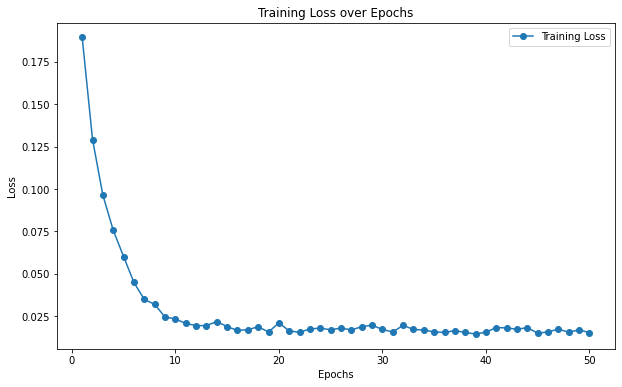

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

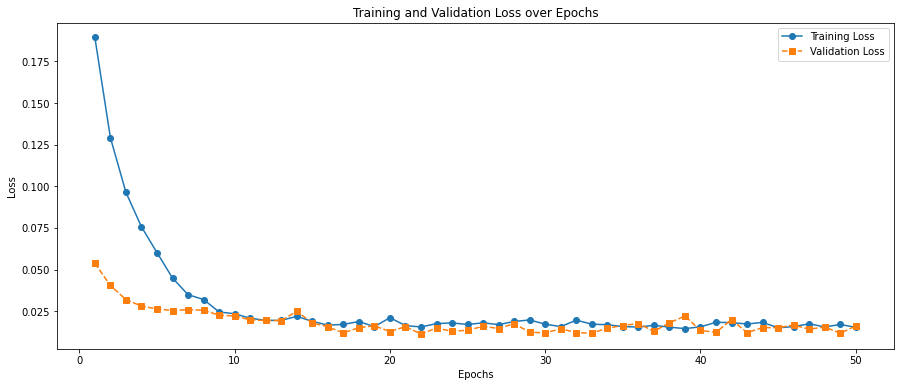

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model_LT4/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08129994914033936
MAE : 0.067050857981525


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,-128470.960938,44787.893
1,-927.586304,14909.156
2,-22195.708984,54595.378
3,214519.000000,242829.930
4,305365.656250,406860.687
5,487800.062500,605897.837
6,570613.562500,654073.790
7,645022.750000,701143.910
8,597033.562500,657891.340
9,449364.906250,432215.421


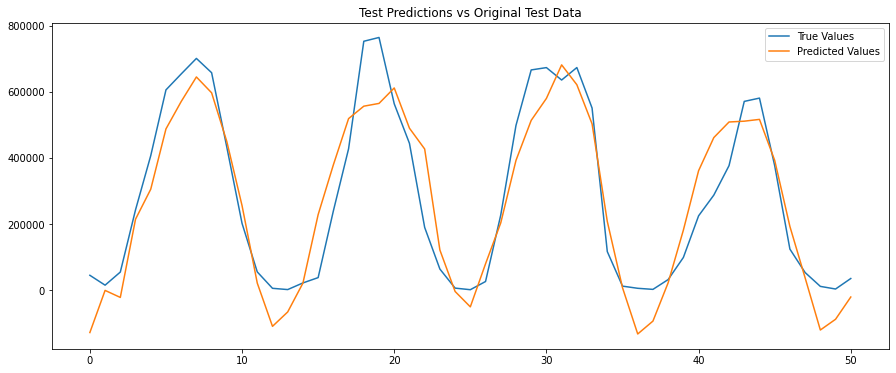

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

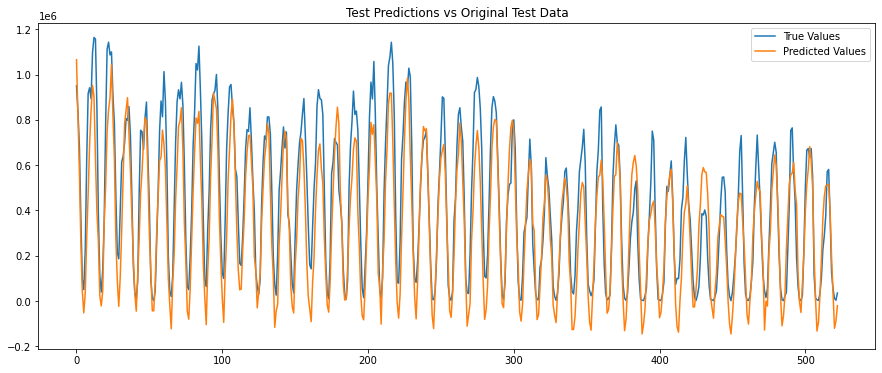

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()